<a href="https://colab.research.google.com/github/ngoantnut/data-science-by-Huy-teacher/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from warnings import WarningMessage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv")
print(data.head)

<bound method NDFrame.head of               Date Country/Region Province/State  Confirmed  Recovered  Deaths
0       2020-01-22    Afghanistan            NaN          0        0.0       0
1       2020-01-23    Afghanistan            NaN          0        0.0       0
2       2020-01-24    Afghanistan            NaN          0        0.0       0
3       2020-01-25    Afghanistan            NaN          0        0.0       0
4       2020-01-26    Afghanistan            NaN          0        0.0       0
...            ...            ...            ...        ...        ...     ...
231739  2022-04-12       Zimbabwe            NaN     247094        0.0    5460
231740  2022-04-13       Zimbabwe            NaN     247160        0.0    5460
231741  2022-04-14       Zimbabwe            NaN     247208        0.0    5462
231742  2022-04-15       Zimbabwe            NaN     247237        0.0    5462
231743  2022-04-16       Zimbabwe            NaN     247237        0.0    5462

[231744 rows x 6 colu

In [ ]:
data.Date=pd.to_datetime(data.Date)

**Task 1**

3 bieu do:

In [ ]:
data_unRecovery = data.Confirmed-data.Recovered
data["unRecovery"] = data_unRecovery
print(data.unRecovery)
print(data.head())

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
            ...   
231739    247094.0
231740    247160.0
231741    247208.0
231742    247237.0
231743    247237.0
Name: unRecovery, Length: 231744, dtype: float64
        Date Country/Region Province/State  Confirmed  Recovered  Deaths  \
0 2020-01-22    Afghanistan            NaN          0        0.0       0   
1 2020-01-23    Afghanistan            NaN          0        0.0       0   
2 2020-01-24    Afghanistan            NaN          0        0.0       0   
3 2020-01-25    Afghanistan            NaN          0        0.0       0   
4 2020-01-26    Afghanistan            NaN          0        0.0       0   

   unRecovery  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [ ]:
dt = data[["Date", "Deaths","unRecovery","Confirmed"]].copy()
print(dt.head())

        Date  Deaths  unRecovery  Confirmed
0 2020-01-22       0         0.0          0
1 2020-01-23       0         0.0          0
2 2020-01-24       0         0.0          0
3 2020-01-25       0         0.0          0
4 2020-01-26       0         0.0          0


In [ ]:
dg = data.groupby(pd.Grouper(key='Date', freq='1M')).sum()
#dg.index = dg.index.strftime('%B')
print(dg)


              Confirmed     Recovered     Deaths    unRecovery
Date                                                          
2020-01-31        38557  8.690000e+02        889  3.765800e+04
2020-02-29      1672172  3.808390e+05      46911  1.290996e+06
2020-03-31      8992099  2.701204e+06     400477  6.218073e+06
2020-04-30     63431920  1.601755e+07    4411513  4.639832e+07
2020-05-31    145055405  5.295302e+07   10000544  8.971806e+07
2020-06-30    246752098  1.170576e+08   13982803  1.267122e+08
2020-07-31    431753509  2.395819e+08   19316724  1.887528e+08
2020-08-31    672118909  4.201224e+08   25076402  2.481881e+08
2020-09-30    895525203  6.049193e+08   29528356  2.863217e+08
2020-10-31   1229442856  8.381173e+08   35836520  3.851696e+08
2020-11-30   1648161349  1.058231e+09   41500987  5.807483e+08
2020-12-31   2296871809  1.353401e+09   52902144  9.283165e+08
2021-01-31   2923618458  1.596148e+09   64650114  1.305691e+09
2021-02-28   3062129345  1.689513e+09   69137776  1.349

In [ ]:
print(dg.dtypes)

Confirmed       int64
Recovered     float64
Deaths          int64
unRecovery    float64
dtype: object


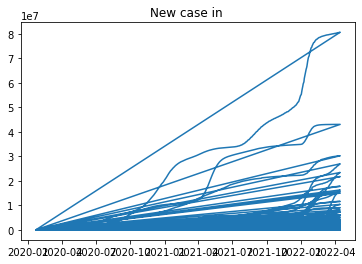

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.title("New case in " )
plt.plot(data.Date, data.Confirmed)


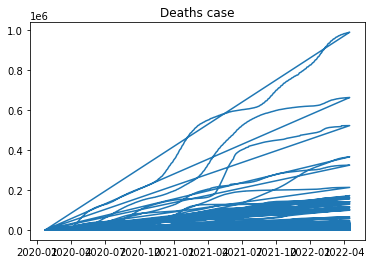

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.title("Deaths case")
plt.plot(dt.Date, dt.Deaths)

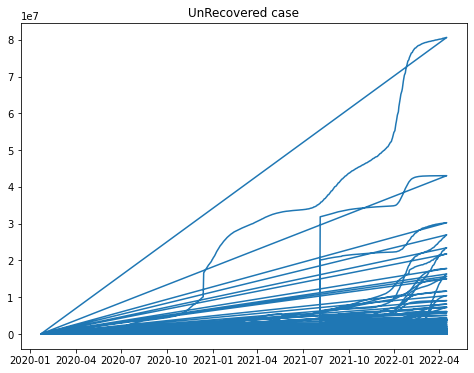

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
plt.title("UnRecovered case")
plt.plot(dt.Date, dt.unRecovery)

Task 2: **văn bản in đậm**

In [ ]:
inputyear = int(input('Nhap nam: '))
data_year = data[data['Date'].dt.year == inputyear]
inputcountry = input('Nhap nuoc: ')
data_coutry = data_year[data_year['Country/Region'] == inputcountry]


Nhap nam: 2020
Nhap nuoc: Cambodia


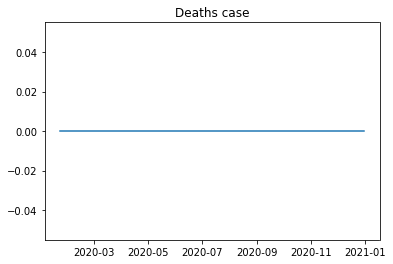

In [ ]:

fig = plt.figure()
ax = plt.axes()
plt.title("Deaths case")
plt.plot(data_coutry.Date, data_coutry.Deaths)

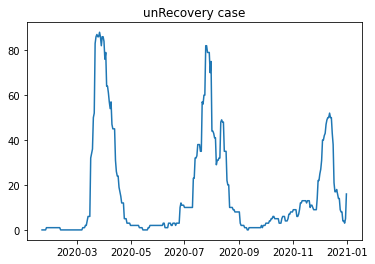

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.title("unRecovery case")
plt.plot(data_coutry.Date, data_coutry.unRecovery)

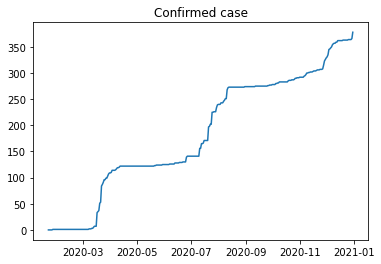

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.title("Confirmed case" )
plt.plot(data_coutry.Date, data_coutry.Confirmed)

Task 3

In [ ]:
data_vn=data[data['Country/Region'] == "Vietnam"]
print(data_vn.head())

             Date Country/Region Province/State  Confirmed  Recovered  Deaths  \
226848 2020-01-22        Vietnam            NaN          0        0.0       0   
226849 2020-01-23        Vietnam            NaN          2        0.0       0   
226850 2020-01-24        Vietnam            NaN          2        0.0       0   
226851 2020-01-25        Vietnam            NaN          2        0.0       0   
226852 2020-01-26        Vietnam            NaN          2        0.0       0   

        unRecovery  
226848         0.0  
226849         2.0  
226850         2.0  
226851         2.0  
226852         2.0  


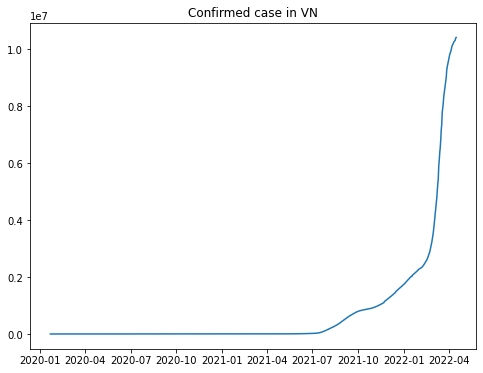

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
plt.title("Confirmed case in VN")
plt.plot(data_vn.Date, data_vn.Confirmed)

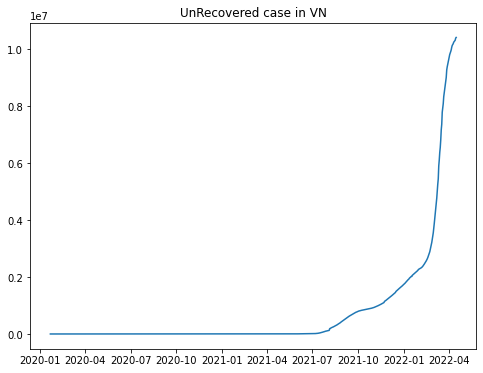

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
plt.title("UnRecovered case in VN")
plt.plot(data_vn.Date, data_vn.unRecovery)

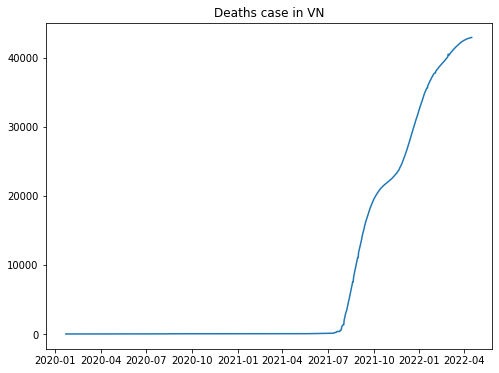

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
plt.title("Deaths case in VN")
plt.plot(data_vn.Date, data_vn.Deaths)

Task 4: 

In [ ]:
sort_max_vn =data_vn.sort_values(by=['Confirmed'], ascending=False)
sort_month=sort_max_vn[:1]
print(sort_month)

             Date Country/Region Province/State  Confirmed  Recovered  Deaths  \
227663 2022-04-16        Vietnam            NaN   10417887        0.0   42934   

        unRecovery  
227663  10417887.0  


In [ ]:
print("Month with number confirmed biggest: ", sort_month.Date)

Month with number confirmed biggest:  227663   2022-04-16
Name: Date, dtype: datetime64[ns]


Task 5:

In [ ]:
sort_min_vn =data_vn.sort_values(by=['Deaths'], ascending=True)
sort_month_deaths=sort_min_vn[:1]
print(sort_month_deaths)

             Date Country/Region Province/State  Confirmed  Recovered  Deaths  \
226848 2020-01-22        Vietnam            NaN          0        0.0       0   

        unRecovery  
226848         0.0  


In [ ]:
print("Month with number deaths smallest: ", sort_month_deaths.Date)

Month with number deaths smallest:  226848   2020-01-22
Name: Date, dtype: datetime64[ns]


Task 6

In [ ]:
dg1 = data_vn.groupby(pd.Grouper(key='Date', freq='1Y')).sum()
print(dg1)

            Confirmed  Recovered   Deaths   unRecovery
Date                                                  
2020-12-31     219337   181669.0     4908      37668.0
2021-12-31  135539309  1079779.0  2936699  134459530.0
2022-12-31  507280051        0.0  4165332  507280051.0


Text(0.5, 1.0, 'Deaths in Vietnam')

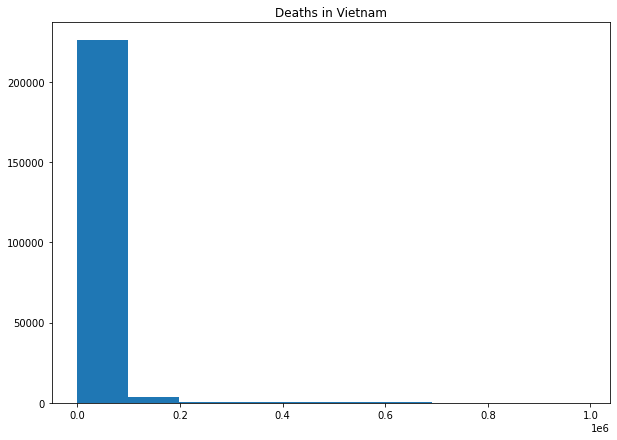

In [ ]:
fig = plt.figure(figsize =(10, 7))
a= dt.Deaths
b = dt.Date
plt.hist(a)
plt.title("Deaths in Vietnam")
 
